In [1]:
import requests
import json
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#need to iterate thru all of the pages on brewerydb site to get all the information so created variables 1-23
#save api_key to variable
pg_nums=list(range(1,24))
pg_nums = [str(i) for i in pg_nums]
api_key = "0b4c0e62f0f03f110eed33afddbca4ea"

In [3]:
def request(pg_nums,api_key):
#     new_list = []
#     for pg in pg_nums:
        url = "http://sandbox-api.brewerydb.com/v2/beers?key=" + api_key + "&p=" + str(pg_nums) + "&withBreweries=Y&withIngredients=Y&format=json"
        response = requests.get(url)
        results = json.loads(response.text)
#         new_list.append(results)
        return results

In [4]:
#saving individual pulled page
pg1 = request(1,api_key)
pg2 = request(2,api_key)
pg3 = request(3,api_key)
pg4 = request(4,api_key)
pg5 = request(5,api_key)
pg6 = request(6,api_key)
pg7 = request(7,api_key)
pg8 = request(8,api_key)
pg9 = request(9,api_key)
pg10 = request(10,api_key)
pg11 = request(11,api_key)
pg12 = request(12,api_key)
pg13 = request(13,api_key)
pg14 = request(14,api_key)
pg15 = request(15,api_key)
pg16 = request(16,api_key)
pg17 = request(17,api_key)
pg18 = request(18,api_key)
pg19 = request(19,api_key)
pg20 = request(20,api_key)
pg21 = request(21,api_key)
pg22 = request(22,api_key)
pg23 = request(23,api_key)

In [5]:
#creating dataframes for each page
#combining all dataframes into a single dataframe
df1 = pd.DataFrame(pg1)
df2 = pd.DataFrame(pg2)
df3 = pd.DataFrame(pg3)
df4 = pd.DataFrame(pg4)
df5 = pd.DataFrame(pg5)
df6 = pd.DataFrame(pg6)
df7 = pd.DataFrame(pg7)
df8 = pd.DataFrame(pg8)
df9 = pd.DataFrame(pg9)
df10 = pd.DataFrame(pg10)
df11 = pd.DataFrame(pg11)
df12 = pd.DataFrame(pg12)
df13 = pd.DataFrame(pg13)
df14 = pd.DataFrame(pg14)
df15 = pd.DataFrame(pg15)
df16 = pd.DataFrame(pg16)
df17 = pd.DataFrame(pg17)
df18 = pd.DataFrame(pg18)
df19 = pd.DataFrame(pg19)
df20 = pd.DataFrame(pg20)
df21 = pd.DataFrame(pg21)
df22 = pd.DataFrame(pg22)
df23 = pd.DataFrame(pg23)
dfcombine = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18,df19,df20,df21,df22,df23])

In [6]:
dfcombine=dfcombine.reset_index()

In [7]:
dfcombine = dfcombine['data'].to_frame()

In [8]:
dfcombine

,data
0,"{'id': 'c4f2KE', 'name': ''Murican Pilsner', '..."
1,"{'id': 'zTTWa2', 'name': '11.5° PLATO', 'nameD..."
2,"{'id': 'zfP2fK', 'name': '12th Of Never', 'nam..."
3,"{'id': 'xwYSL2', 'name': '15th Anniversary Ale..."
4,"{'id': 'UJGpVS', 'name': '16 So Fine Red Wheat..."
...,...
1104,"{'id': 'CScss3', 'name': 'Yonder Bock - Beer C..."
1105,"{'id': 'a8u4ic', 'name': 'Yvan The Great - Bee..."
1106,"{'id': '9GBACV', 'name': 'Zepher Ale', 'nameDi..."
1107,"{'id': 'nwNOxm', 'name': 'ZiegenBock Amber', '..."


In [9]:
i = list(dfcombine.values.tolist())

In [10]:
#creating beer dataframe from values listed in previous dataframe.data column
x = []

for k in i:
    x.append(json_normalize(k))

C:\Users\DongYeop Sager\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


In [11]:
beer = pd.concat(x)

In [12]:
beer

,id,name,nameDisplay,abv,glasswareId,styleId,isOrganic,isRetired,status,statusDisplay,...,style.ogMax,srmId,srm.id,srm.name,srm.hex,servingTemperature,servingTemperatureDisplay,ingredients.misc,style.category.description,style.category.updateDate
0,c4f2KE,'Murican Pilsner,'Murican Pilsner,5.5,4.0,98.0,N,N,verified,Verified,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,zTTWa2,11.5° PLATO,11.5° PLATO,4.5,NaN,164.0,N,N,verified,Verified,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,zfP2fK,12th Of Never,12th Of Never,5.5,NaN,25.0,N,N,verified,Verified,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,xwYSL2,15th Anniversary Ale,15th Anniversary Ale,NaN,NaN,5.0,N,N,verified,Verified,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,UJGpVS,16 So Fine Red Wheat Wine,16 So Fine Red Wheat Wine,11,NaN,35.0,N,N,verified,Verified,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,CScss3,Yonder Bock - Beer Camp Across America,Yonder Bock - Beer Camp Across America (2014),7.7,5.0,89.0,N,N,verified,Verified,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,a8u4ic,Yvan The Great - Beer Camp Across America,Yvan The Great - Beer Camp Across America (2014),6.3,5.0,61.0,N,N,verified,Verified,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,9GBACV,Zepher Ale,Zepher Ale,7.5,5.0,NaN,N,N,verified,Verified,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,nwNOxm,ZiegenBock Amber,ZiegenBock Amber,4.9,NaN,101.0,N,N,verified,Verified,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
beer.columns

Index(['id', 'name', 'nameDisplay', 'abv', 'glasswareId', 'styleId',
       'isOrganic', 'isRetired', 'status', 'statusDisplay', 'createDate',
       'updateDate', 'breweries', 'labels.icon', 'labels.medium',
       'labels.large', 'labels.contentAwareIcon', 'labels.contentAwareMedium',
       'labels.contentAwareLarge', 'glass.id', 'glass.name',
       'glass.createDate', 'style.id', 'style.categoryId', 'style.category.id',
       'style.category.name', 'style.category.createDate', 'style.name',
       'style.shortName', 'style.description', 'style.ibuMin', 'style.ibuMax',
       'style.abvMin', 'style.abvMax', 'style.srmMin', 'style.srmMax',
       'style.ogMin', 'style.fgMin', 'style.fgMax', 'style.createDate',
       'style.updateDate', 'description', 'ibu', 'originalGravity',
       'availableId', 'foodPairings', 'available.id', 'available.name',
       'available.description', 'ingredients.hops', 'ingredients.malt',
       'ingredients.yeast', 'year', 'style.ogMax', 'srmId', 'srm

In [14]:
beer['breweries']

0    [{'id': 'nHLlnK', 'name': 'Sierra Nevada Brewi...
0    [{'id': 'nHLlnK', 'name': 'Sierra Nevada Brewi...
0    [{'id': 'nLsoQ9', 'name': 'Lagunitas Brewing C...
0    [{'id': 'TMc6H2', 'name': 'SweetWater Brewing ...
0    [{'id': 'TMc6H2', 'name': 'SweetWater Brewing ...
                           ...                        
0    [{'id': 'nHLlnK', 'name': 'Sierra Nevada Brewi...
0    [{'id': 'nHLlnK', 'name': 'Sierra Nevada Brewi...
0    [{'id': 'nLsoQ9', 'name': 'Lagunitas Brewing C...
0    [{'id': 'BznahA', 'name': 'Anheuser-Busch InBe...
0    [{'id': 'AqEUBQ', 'name': 'New Holland Brewing...
Name: breweries, Length: 1109, dtype: object

In [15]:
beer.to_csv('beer1.csv', index = False)

In [17]:
#doing the same thing with the brewery column, extracting and assigning to a different dataframe
a=list(beer['breweries'].values.tolist())
v = []
for k in a:
    v.append(json_normalize(k))

C:\Users\DongYeop Sager\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


In [18]:
brewery = pd.concat(v)

In [19]:
brewery.columns

Index(['id', 'name', 'nameShortDisplay', 'description', 'website',
       'established', 'isOrganic', 'status', 'statusDisplay', 'createDate',
       'updateDate', 'isMassOwned', 'isInBusiness', 'isVerified', 'locations',
       'images.icon', 'images.medium', 'images.large', 'images.squareMedium',
       'images.squareLarge', 'mailingListUrl'],
      dtype='object')

In [20]:
brewery.to_csv('brewery1.csv', index = False)

### Hops ###

In [21]:
hops = [{'key':10}]
beer['ingredients.hops'] = beer['ingredients.hops'].apply(lambda x: x if x==x else hops)

In [22]:
b=list(beer['ingredients.hops'].values.tolist())
w = []
for k in b:
    w.append(json_normalize(k))

C:\Users\DongYeop Sager\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  after removing the cwd from sys.path.


In [23]:
hops= pd.concat(w)

In [24]:
hops

,key,id,name,description,countryOfOrigin,alphaAcidMin,betaAcidMin,betaAcidMax,humuleneMin,humuleneMax,...,country.name,country.displayName,country.isoThree,country.numberCode,country.createDate,alphaAcidMax,isNoble,forBittering,forFlavor,forAroma
0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,22.0,Cascade,Cascade was created in the United States as an...,US,5.5,4.5,7.0,13.0,13.0,...,UNITED STATES,United States,USA,840.0,2012-01-03 02:41:33,NaN,NaN,NaN,NaN,NaN
1,NaN,24.0,Centennial,"Sometimes called a super Cascade, Centennial w...",US,6.0,3.5,4.5,10.0,18.0,...,UNITED STATES,United States,USA,840.0,2012-01-03 02:41:33,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Malt ###

In [25]:
malt = [{'key':10}]
beer['ingredients.malt']= beer['ingredients.malt'].apply(lambda x: x if x==x else malt)

In [26]:
c=list(beer['ingredients.malt'].values.tolist())
x = []
for k in c:
    x.append(json_normalize(k))

C:\Users\DongYeop Sager\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  after removing the cwd from sys.path.


In [27]:
malt = pd.concat(x)

In [28]:
malt

,key,id,name,characteristics,category,categoryDisplay,createDate,description,countryOfOrigin,srmId,...,updateDate,srm.id,srm.name,srm.hex,country.isoCode,country.name,country.displayName,country.isoThree,country.numberCode,country.createDate
0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,247.0,Black Malt,"[{'id': 7, 'name': 'Coffee', 'description': 'I...",malt,"Malts, Grains, & Fermentables",2013-06-24 16:07:42,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,650.0,Munich Malt,"[{'id': 10, 'name': 'Malty', 'description': 'I...",malt,"Malts, Grains, & Fermentables",2013-06-24 16:07:52,Munich Malt has a malty sweet flavor character...,DE,9.0,...,2013-06-24 16:10:14,9.0,9,E58500,DE,GERMANY,Germany,DEU,276.0,2012-01-03 02:41:33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Yeast ###

In [29]:
yeast = [{'key':10}]
beer['ingredients.yeast']= beer['ingredients.yeast'].apply(lambda x: x if x==x else yeast)

In [30]:
d=list(beer['ingredients.yeast'].values.tolist())
y = []
for k in d:
    y.append(json_normalize(k))

C:\Users\DongYeop Sager\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  after removing the cwd from sys.path.


In [31]:
yeast = pd.concat(y)

### was not able to find any useful data within the ingredients portions malt, yeast, and hops ###

In [32]:
#most, if not all values were Nan or not filled out from data source
yeast

,key,id,name,description,yeastType,attenuationMin,attenuationMax,fermentTempMin,fermentTempMax,alcoholToleranceMin,alcoholToleranceMax,productId,supplier,yeastFormat,category,categoryDisplay,createDate,updateDate
0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
beer['style.shortName'].value_counts()

American IPA               136
American Pale               67
Imperial IPA                59
American Imperial Stout     53
Saison                      33
                          ... 
Leichtbier                   1
English Brown                1
American/Belgian Pale        1
Common Cider                 1
Honey Beer                   1
Name: style.shortName, Length: 121, dtype: int64

In [34]:
beer.columns

Index(['id', 'name', 'nameDisplay', 'abv', 'glasswareId', 'styleId',
       'isOrganic', 'isRetired', 'status', 'statusDisplay', 'createDate',
       'updateDate', 'breweries', 'labels.icon', 'labels.medium',
       'labels.large', 'labels.contentAwareIcon', 'labels.contentAwareMedium',
       'labels.contentAwareLarge', 'glass.id', 'glass.name',
       'glass.createDate', 'style.id', 'style.categoryId', 'style.category.id',
       'style.category.name', 'style.category.createDate', 'style.name',
       'style.shortName', 'style.description', 'style.ibuMin', 'style.ibuMax',
       'style.abvMin', 'style.abvMax', 'style.srmMin', 'style.srmMax',
       'style.ogMin', 'style.fgMin', 'style.fgMax', 'style.createDate',
       'style.updateDate', 'description', 'ibu', 'originalGravity',
       'availableId', 'foodPairings', 'available.id', 'available.name',
       'available.description', 'ingredients.hops', 'ingredients.malt',
       'ingredients.yeast', 'year', 'style.ogMax', 'srmId', 'srm

id, namedisplay, 

In [35]:
beers1=beer.drop(['id','nameDisplay','glasswareId','statusDisplay','createDate','updateDate','labels.icon', 'labels.medium',
                  'labels.large','labels.contentAwareIcon', 'labels.contentAwareMedium','labels.contentAwareLarge',
                  'glass.id', 'glass.name','glass.createDate','style.id','style.categoryId', 'style.category.id',
                  'style.category.createDate','style.description','style.createDate','style.updateDate', 'description','availableId',
                  'foodPairings', 'available.id', 'available.name','available.description','year','style.ogMax', 'srmId', 'srm.id',
                  'srm.name', 'srm.hex', 'servingTemperature','servingTemperatureDisplay'],
                axis=1)

In [36]:
beers1.shape

(1109, 27)

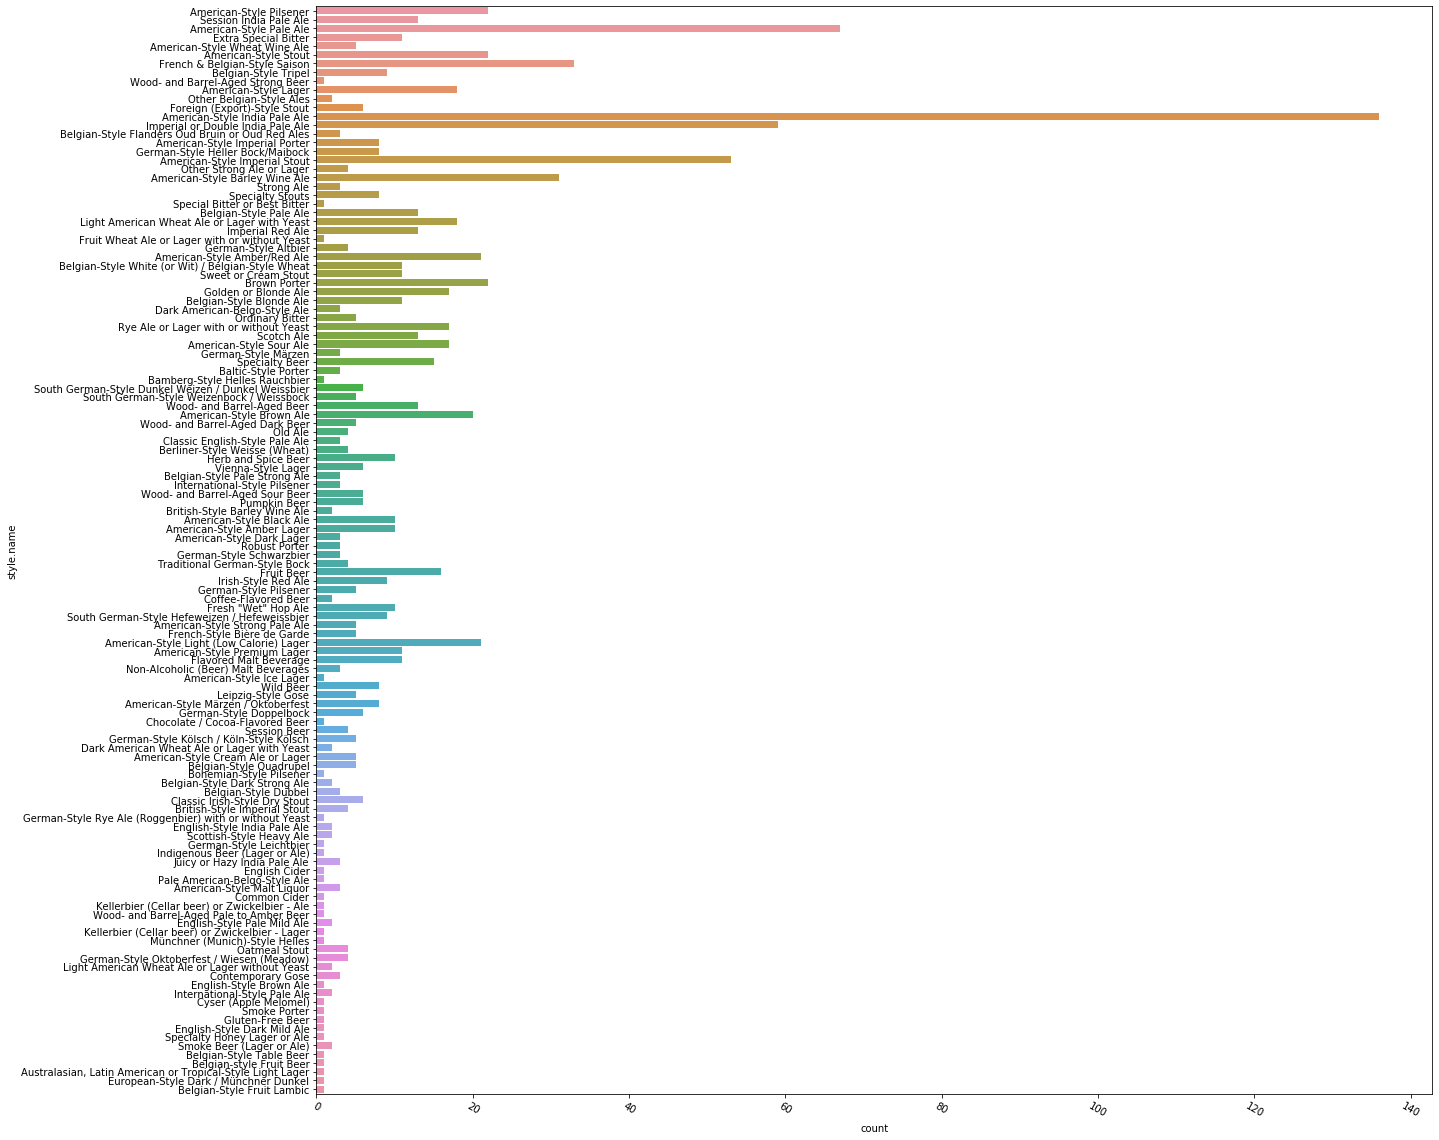

In [37]:
f,categcount = plt.subplots(figsize=(20,20))
plt.xticks(rotation=330)
categcount = sns.countplot(y='style.name',data=beers1)